# Markdown

- 1- Authentication,
- 2- Get CSV file.
- 3- Get unique tickers in order for us to search tweets that relate to them on twitter.
- 4- Download the tweets that have those tickers. <------- Here.
- 5- Create a model that can classify those tweets into Positive/Negative.
- 6- Use the model in step 5 to classify the downloaded tweets in step 4.
- 7- get only the positive tweets.
- 8- Analysis.

In [80]:
# Import Libraries
import seaborn as sns
import pandas as pd 
from textblob import TextBlob
import sys
import ast
import tweepy
import matplotlib.pyplot as plt #to display our wordcloud
import pandas as pd
import numpy as np #to get the color of our image
import os
import nltk
import pycountry
import re
import string
from dotenv import load_dotenv
import requests
import json
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image #to load out image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omarm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Helper

In [128]:
# Setting Up, basic Sentiment Analysis review
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

# Authentication.

In [130]:
load_dotenv()

True

In [131]:
# Authentication
# consumerKey = os.getenv("TWITTER_API_KEY")
# consumerSecret = os.getenv("TWITTER_SECRET_KEY")
# accessToken = os.getenv("TWITTER_ACCESS_TOKEN")
# accessTokenSecret = os.getenv("TWITTER_ACCESS_TOKEN_SECRET")

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [83]:
df = pd.read_csv("https://raw.githubusercontent.com/joebary/Project_3_Team_1/main/ESG_data.csv")
df.head(3)

# Extract all the unique tickers.

In [103]:
all_tickers = list(df["Ticker"].unique())
print(all_tickers)
len(all_tickers)

['AAPL', 'MSFT', 'AMZN', 'FB', 'TSLA', 'GOOGL', 'JNJ', 'JPM', 'V', 'UNH', 'PG', 'NVDA', 'DIS', 'MA', 'HD', 'PYPL', 'BAC', 'VZ', 'CMCSA', 'ADBE', 'NFLX', 'INTC', 'T', 'MRK', 'PFE', 'WMT', 'CRM', 'TMO', 'ABT', 'PEP', 'KO', 'XOM', 'CSCO', 'ABBV', 'NKE', 'AVGO', 'QCOM', 'CVX', 'ACN', 'COST', 'MDT', 'MCD', 'NEE', 'TXN', 'DHR', 'HON', 'UNP', 'BMY', 'WFC', 'C', 'AMGN', 'LLY', 'PM', 'SBUX', 'LOW', 'ORCL', 'IBM', 'UPS', 'BA', 'MS', 'BLK', 'RTX', 'CAT', 'GS', 'NOW', 'GE', 'MMM', 'INTU', 'CVS', 'AMT', 'TGT', 'ISRG', 'DE', 'CHTR', 'BKNG', 'SCHW', 'MU', 'AMAT', 'LMT', 'FIS', 'TJX', 'ANTM', 'MDLZ', 'SYK', 'CI', 'ZTS', 'AXP', 'SPGI', 'GILD', 'TMUS', 'MO', 'LRCX', 'BDX', 'ADP', 'CSX', 'CME', 'PLD', 'CB', 'CL', 'TFC', 'ADSK', 'ATVI', 'USB', 'PNC', 'DUK', 'FISV', 'CCI', 'ICE', 'SO', 'NSC', 'APD', 'GPN', 'VRTX', 'EQIX', 'ITW', 'SHW', 'D', 'FDX', 'DD', 'HUM', 'EL', 'ADI', 'MMC', 'ECL', 'ILMN', 'EW', 'PGR', 'GM', 'DG', 'BSX', 'NEM', 'ETN', 'COF', 'REGN', 'EMR', 'COP', 'AON', 'WM', 'HCA', 'MCO', 'NOC', 'FCX

307

## According to this website these are the top ten ESG stocks on the market right now.

https://www.investors.com/news/esg-companies-list-best-esg-stocks-environmental-social-governance-values/


In [124]:
top_ten_list = ["MSFT", "LIN","ACN","JBHT","XYL",
               "TXN","CRM","GIL","MCB","INFO"]

In [123]:
keywords = top_ten_list
keywords

['MSFT', 'LIN', 'ACN', 'JBHT', 'XYL', 'TXN', 'CRM', 'GIL', 'MCB', 'INFO']

# Fetching Tweets by Keyword


## first get the amount to search per keyword

In [127]:
# the number of tweets to search per keyword/ticker.
noOfTweets = 240

## Query twitter.
In order to search for tweets we must specify the parameters.
 - Language is set to english.
 - start date and end date is set to 2021-10-01, 2021-12-01
 - the amount of tweets per keyword is 240.
 - the inner for loop just gets the corresponding ticker name, so we dont lose track of which tweet is talking about which ticker.

In [87]:
# Dates
date_since = "2021-10-01"
date_until = "2021-12-01"

# List for all the tickers and the tweets.
ticker = []
tweets = []
for keyword in keywords:
    tweets.append(tweepy.Cursor(api.search_tweets, q = keyword ,lang="en", since=date_since, until=date_until).items(noOfTweets))
    for i in range(noOfTweets):
        ticker.append(keyword)


## Creating a dataframe where we match the tweet text to the ticker/keyword.

In [ ]:
df = pd.DataFrame(list(zip(tweets, ticker)), columns =['tweets', 'ticker'])
df

### plotting the occurrence of every ticker.

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='ticker', data=df)

In [88]:
#create an empty list to store results
#tweets_list=[]

# iterate throw the results of the api search
#for item in tweets:
    #create a dict object with the values that we want to store it
    #myTweet = { "tweet_id": item.id_str,
    #            "location": item.user.location, 
    #            "text": item.text, 
    #            "tweet_date": item.created_at
    #          }

In [98]:
# Collect a list of tweets

# This is going to analyze the text

Getting the count  of all the postive, neutral and negative tweets as well as storing the actual tweets and their respective polarity.

In [ ]:
# counts
positive  = 0
negative = 0
neutral = 0

# score
polarity = 0

# lists
neutral_list = []
negative_list = []
positive_list = []

### Putting everytweet in the correct list for further analysis.

In [18]:
tweet_list = []
for tweet in tweets:
    
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')


AttributeError: 'ItemIterator' object has no attribute 'text'

### Creating dataframes to plot and review.

In [ ]:
# Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)


# DataFrame to analyze the sentiment distribution
tweet_distribution = pd.DataFrame.from_dict({"total_tweets_counts":len(tweet_list), "postive_tweets_count":len(positive_list),
             "negative_tweets_count":len(negative_list),
             "neutral_tweets_counts":len(neutral_list)}, orient="index").T
display(tweet_distribution)


# saving data frame to CSV files
tweet_list.to_csv("tweet_list.csv")
neutral_list.to_csv("neutral_list.csv")
negative_list.to_csv("negative_list.csv")
positive_list.to_csv("positive_list.csv")



In [ ]:
# Review the Tweets DataFrame
tweet_list

### Visualize the top ten tickers in All tweets, postive tweets, negative tweets, neutral tweets.

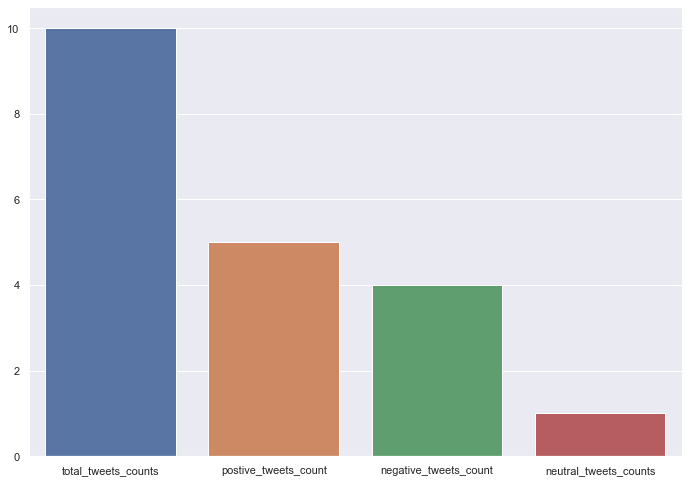

In [122]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(data=tweet_distribution)